In [1]:
import data_preprocess
import models
import train 
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


## **Data preprocess**

In [3]:
img_size=(200,200)
path=r'D:\MSML\SEM 1\ML\ML Projects\Project 3\DL-CNN\data\flowers'
label_names = ["bougainvillea","daisies","garden_roses","gardenias","hibiscus","hydrangeas","lilies","orchids","peonies","tulip"]
Images,labels,label_idx=data_preprocess.preprocess(img_size=img_size,data_dir=path,label_names=label_names)
Images = np.array(Images, dtype=np.float32)
label_idx = np.array(label_idx, dtype=np.int32)
labels = np.array(labels, dtype=object)
print('img shape:',Images.shape)
print('label idx shape:',label_idx.shape)
print('label length:',len(labels))


100%|██████████| 733/733 [00:15<00:00, 48.27it/s]

img shape: (733, 200, 200, 3)
label idx shape: (733,)
label length: 733


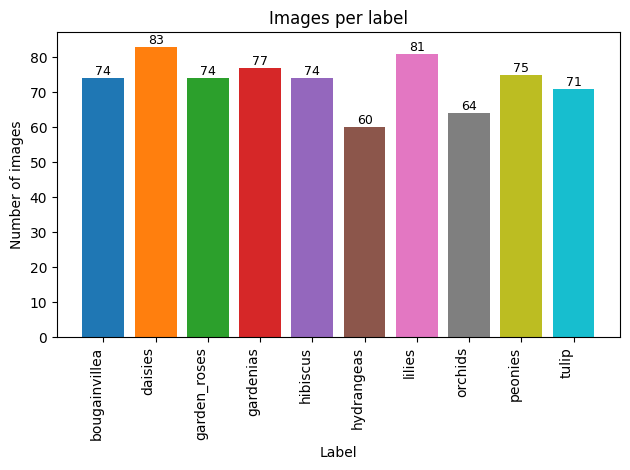

In [4]:
import matplotlib.pyplot as plt

counts = np.bincount(label_idx.astype(int), minlength=len(label_names))
x = np.arange(len(label_names))

plt.figure()
bars = plt.bar(x, counts, color=plt.cm.tab10(x % 10))
plt.xticks(x, label_names, rotation=90, ha="right")
plt.xlabel("Label")
plt.ylabel("Number of images")
plt.title("Images per label")

for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


## **1. Creating a Convolutional Neural Network for Classification**

### **1.1. Hyper parameters**

In [5]:

droup_outsize=0.30;n_classes=10
test_size=0.2
batch_size=64 
n_epochs=50 # 

In [6]:
from keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
tf.keras.backend.clear_session()
cnn=models.build_cnn(droup_outsize=droup_outsize,n_classes=n_classes)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
  

## **1.2. Compile and train**

In [7]:
X_test,y_test,model,history=train.train(Images,label_idx,cnn,n_epochs,batch_size)

Epoch 1/50
10/10 [==============================] - 7s 152ms/step - loss: 12.6577 - accuracy: 0.0939
Epoch 2/50
10/10 [==============================] - 1s 100ms/step - loss: 2.4352 - accuracy: 0.1092
Epoch 3/50
10/10 [==============================] - 1s 98ms/step - loss: 2.2847 - accuracy: 0.1160
Epoch 4/50
10/10 [==============================] - 1s 98ms/step - loss: 2.2440 - accuracy: 0.1536
Epoch 5/50
10/10 [==============================] - 1s 98ms/step - loss: 2.1791 - accuracy: 0.1809
Epoch 6/50
10/10 [==============================] - 1s 97ms/step - loss: 2.0833 - accuracy: 0.2218
Epoch 7/50
10/10 [==============================] - 1s 98ms/step - loss: 2.0187 - accuracy: 0.2526
Epoch 8/50
10/10 [==============================] - 1s 98ms/step - loss: 1.8813 - accuracy: 0.3311
Epoch 9/50
10/10 [==============================] - 1s 98ms/step - loss: 1.8682 - accuracy: 0.3157
Epoch 10/50
10/10 [==============================] - 1s 97ms/step - loss: 1.8659 - accuracy: 0.3276
Epoch 

In [8]:
def eval(history,model):
    #-------- epoch Vs train Accuracy graph ------#
    
    epochs = range(len(history.history['accuracy']))

    plt.plot(epochs, history.history['accuracy'], 'g', label='Accuracy of Training Data')
    #plt.plot(epochs, history.history['val_accuracy'], 'r', label='Accuracy of validation Data')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc=0)
    plt.figure()

    
    predictions = model.predict(X_test, batch_size= batch_size)
    predictions = np.argmax(predictions, axis= 1)
    actuals = y_test

    testing_accuracy = metrics.accuracy_score(actuals, predictions)
    print(f'testing accuracy',testing_accuracy)

    #cm in visual
    cm = confusion_matrix(actuals, predictions)
    import seaborn as sn
    plt.figure(figsize = (7,5))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

    print(classification_report(actuals, predictions))


    return testing_accuracy

    



3/3 [==============================] - 0s 62ms/step
testing accuracy 0.5782312925170068
              precision    recall  f1-score   support

           0       0.52      0.93      0.67        15
           1       0.93      0.76      0.84        17
           2       0.62      0.33      0.43        15
           3       0.88      1.00      0.94        15
           4       0.38      0.73      0.50        15
           5       0.62      0.83      0.71        12
           6       0.40      0.12      0.19        16
           7       0.50      0.08      0.13        13
           8       0.47      0.47      0.47        15
           9       0.50      0.50      0.50        14

    accuracy                           0.58       147
   macro avg       0.58      0.58      0.54       147
weighted avg       0.59      0.58      0.54       147



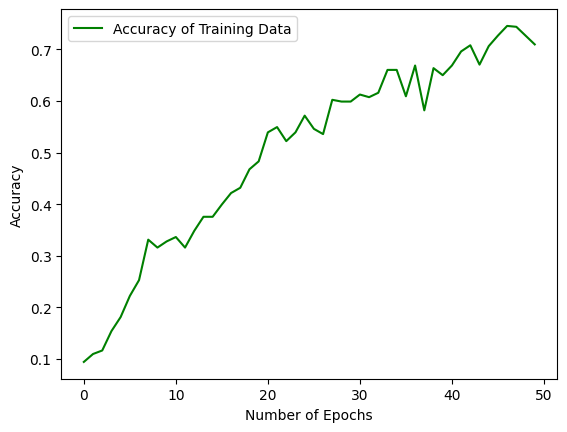

<Figure size 640x480 with 0 Axes>

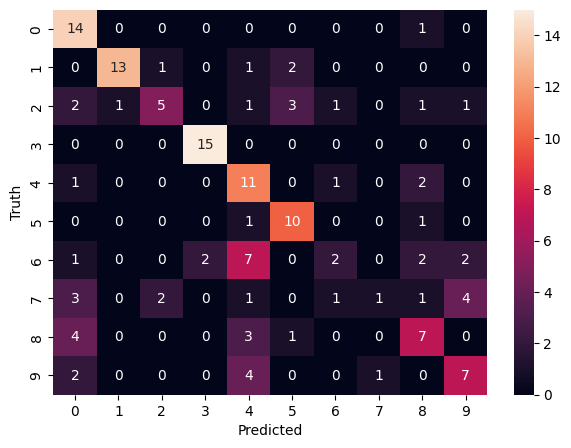

In [9]:
cnn_test_acc=eval(history,model)

## **2.Transfer Learning Using VGG16 Model**

 hyperparamters


In [ ]:
n_epochs=10
batch_size=32 # reduced batch size due to memory exhaust issue


In [11]:
from keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
import tensorflow as tf
tf.keras.backend.clear_session()
vgg_transfer=models.build_VGG16(droup_outsize=droup_outsize,n_classes=n_classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
______________________________________

## **2.2. Compile and train**

In [12]:
X_test,y_test,model,history=train.train(Images,label_idx,vgg_transfer,n_epochs,batch_size)

Epoch 1/10
19/19 [==============================] - 4s 125ms/step - loss: 6.0644 - accuracy: 0.3208
Epoch 2/10
19/19 [==============================] - 2s 109ms/step - loss: 1.0303 - accuracy: 0.7952
Epoch 3/10
19/19 [==============================] - 2s 109ms/step - loss: 0.4015 - accuracy: 0.8959
Epoch 4/10
19/19 [==============================] - 2s 110ms/step - loss: 0.2562 - accuracy: 0.9369
Epoch 5/10
19/19 [==============================] - 2s 110ms/step - loss: 0.1572 - accuracy: 0.9505
Epoch 6/10
19/19 [==============================] - 2s 110ms/step - loss: 0.1099 - accuracy: 0.9625
Epoch 7/10
19/19 [==============================] - 2s 109ms/step - loss: 0.0863 - accuracy: 0.9676
Epoch 8/10
19/19 [==============================] - 2s 109ms/step - loss: 0.0803 - accuracy: 0.9727
Epoch 9/10
19/19 [==============================] - 2s 109ms/step - loss: 0.0435 - accuracy: 0.9863
Epoch 10/10
19/19 [==============================] - 2s 109ms/step - loss: 0.0408 - accuracy: 0.9846

5/5 [==============================] - 1s 250ms/step
testing accuracy 0.8639455782312925
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       1.00      0.94      0.97        17
           2       0.61      0.73      0.67        15
           3       1.00      0.93      0.97        15
           4       1.00      0.93      0.97        15
           5       0.85      0.92      0.88        12
           6       1.00      0.94      0.97        16
           7       0.90      0.69      0.78        13
           8       0.59      0.87      0.70        15
           9       1.00      0.93      0.96        14

    accuracy                           0.86       147
   macro avg       0.89      0.86      0.87       147
weighted avg       0.89      0.86      0.87       147



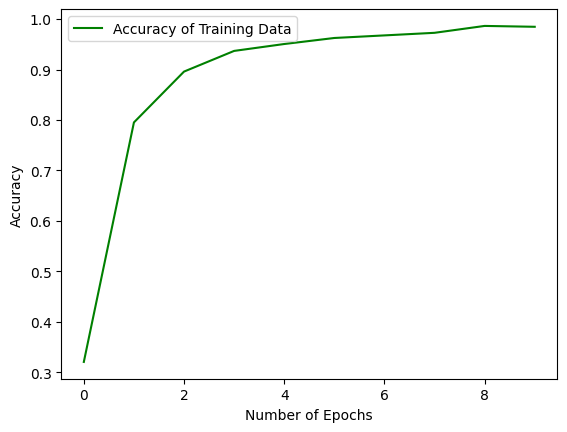

<Figure size 640x480 with 0 Axes>

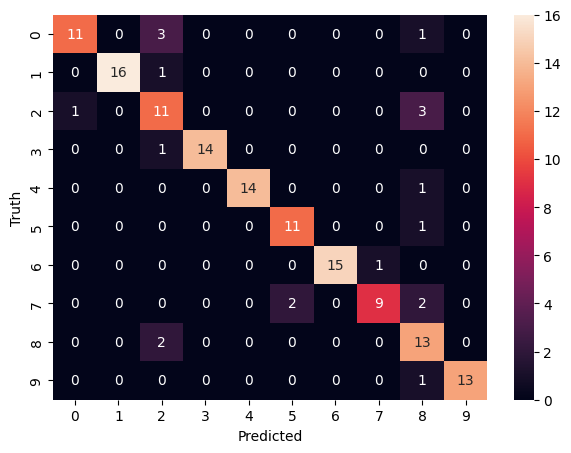

In [13]:
vgg_transfer_test_acc=eval(history,model)